In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1= pd.read_csv("cln3_tn.movie_budgets.csv")
df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
0,0,0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,1,1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,2,2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,3,3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,4,4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636
...,...,...,...,...,...,...,...,...,...,...,...
5227,5228,5775,5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,923.485714
5228,5229,5776,5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-87.142857
5229,5230,5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,3908.250000
5230,5231,5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-73.240000


In [3]:
df2= pd.read_csv('data/cln_imdb_title_basics.csv')
df2.head()

,Unnamed: 0,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df1 = df1.set_index("movie")

In [5]:
df2 = df2.set_index('primary_title')

In [6]:
print(df2.isnull().sum())

Unnamed: 0         0
idx                0
tconst             0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [7]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df1.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

In [29]:
df3=df2.join(df1,on = "primary_title", how= "inner")
df3.head()

,idx,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
primary_title,,,,,,,,,,,,,,
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135
The Overnight,40,tt0326592,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
The Overnight,67603,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
On the Road,48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792
On the Road,39490,tt2404548,On the Road,2011,90.0,Drama,2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792


In [31]:
profit_as_percentage = df3["profit_as_percentage"]

In [32]:
profit = df3['profit']

In [33]:
runtime_minutes = df3["runtime_minutes"]

In [34]:
correlation = profit_as_percentage.corr(runtime_minutes)
print(correlation)

-0.05826935366783482


# No correlation between profit % and Runtime 

In [35]:
correlation = runtime_minutes.corr(profit)
print(correlation)

0.13134836926622043


In [38]:
df3["genres"] = df3["genres"].map(lambda x: x.split(','))
df3.head()

AttributeError: 'list' object has no attribute 'split'

In [39]:
df3 = df3.explode("genres")
df3.head()

,idx,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
primary_title,,,,,,,,,,,,,,
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,Action,2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,Adventure,2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,Fantasy,2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135
The Overnight,40,tt0326592,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
The Overnight,67603,tt3844362,The Overnight,2015,79.0,Comedy,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000


In [40]:
df3 = df3.loc[df3["genres"] != "None"]

In [43]:
df4 = df3.groupby ("genres")["profit_as_percentage"].median()
df4.sort_values(inplace = True)
df4.head()

genres
Western    -6.503600
News       35.849094
Sport      37.359138
War        38.021009
Crime      53.753771
Name: profit_as_percentage, dtype: float64

In [44]:
sns.set_theme()

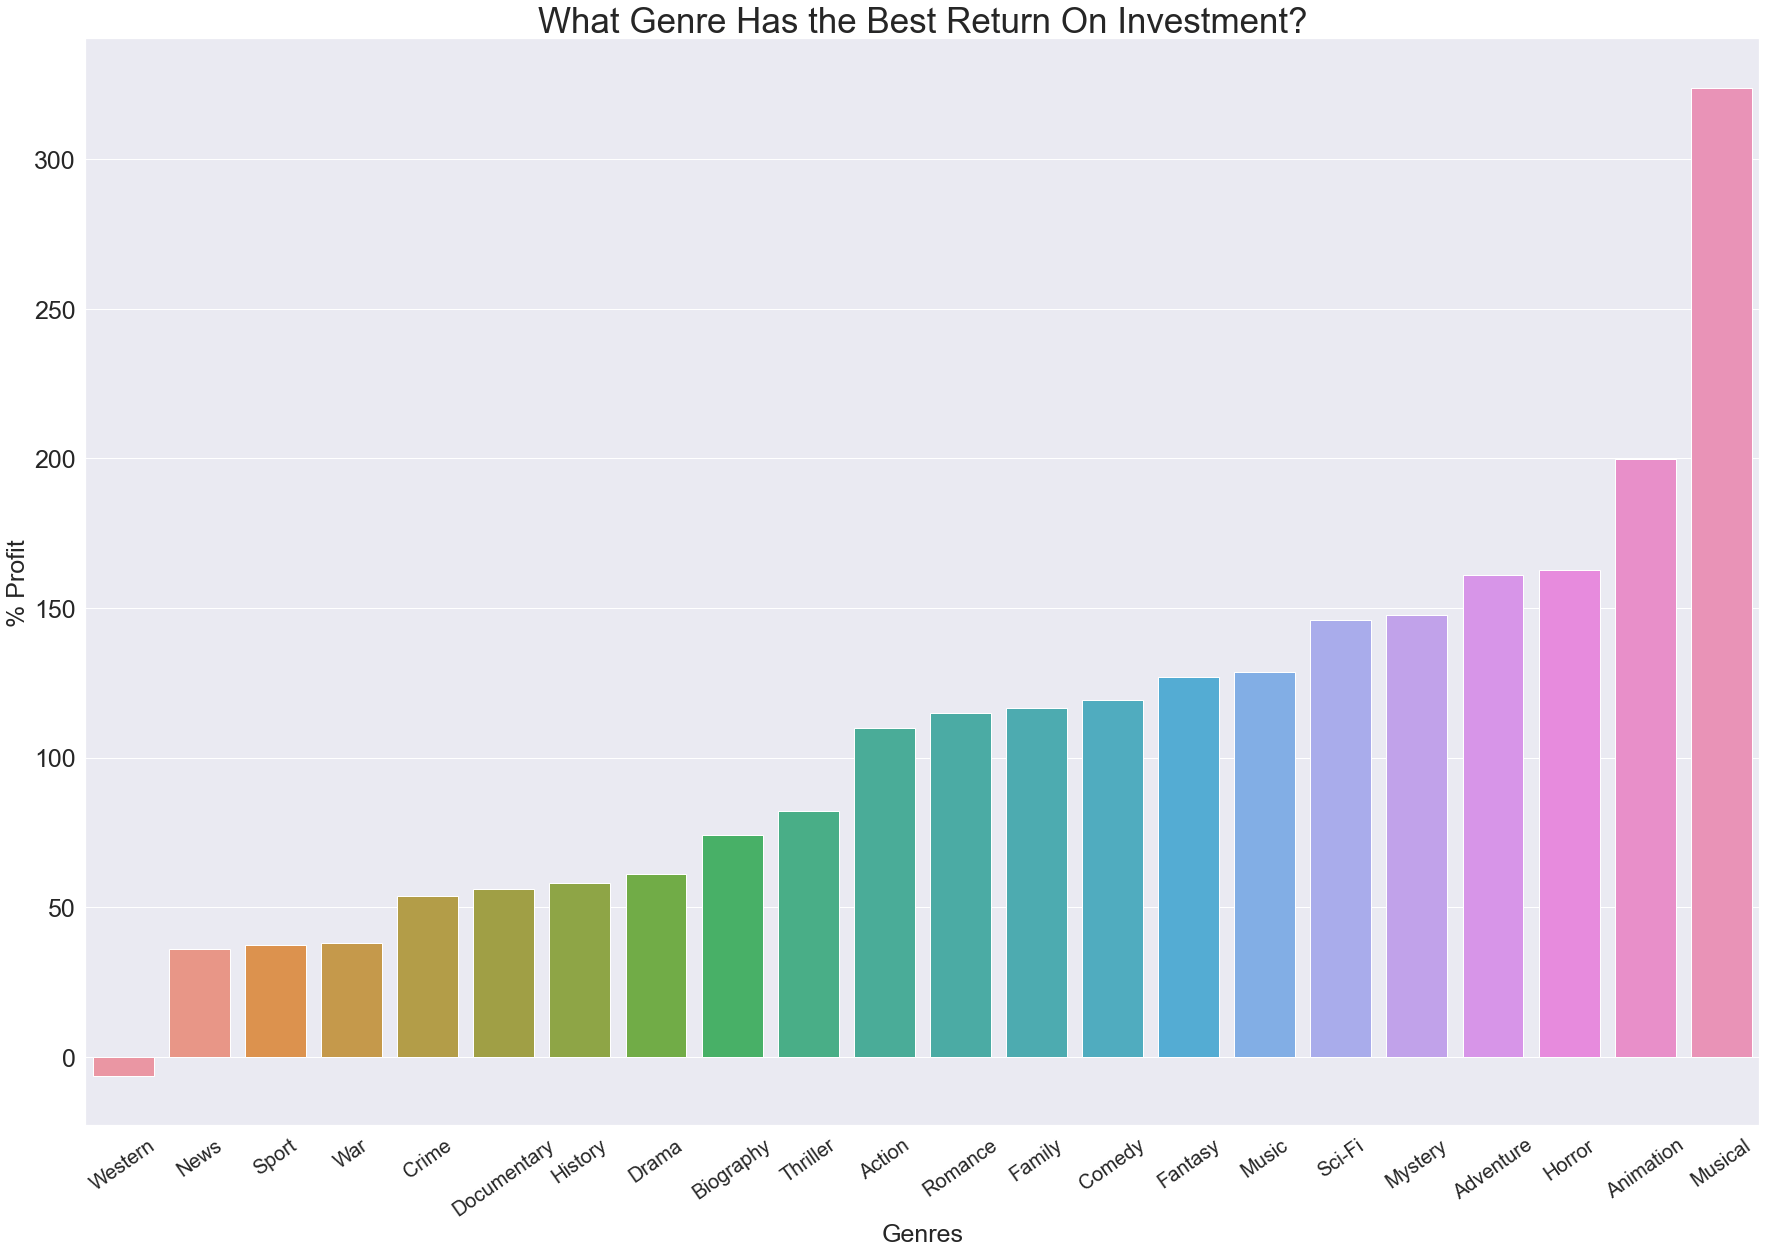

In [46]:
fig, ax =plt.subplots(figsize = (30,20))
ax = sns.barplot(x=df4.index, y=df4.values)
plt.title("What Genre Has the Best Return On Investment?", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Genres", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.set_xticklabels(list(df4.index), fontsize = 20, rotation = 35);
plt.savefig('images/Genre_return_on_investment')


# Musicals and Animation movies have the highest % return on investment

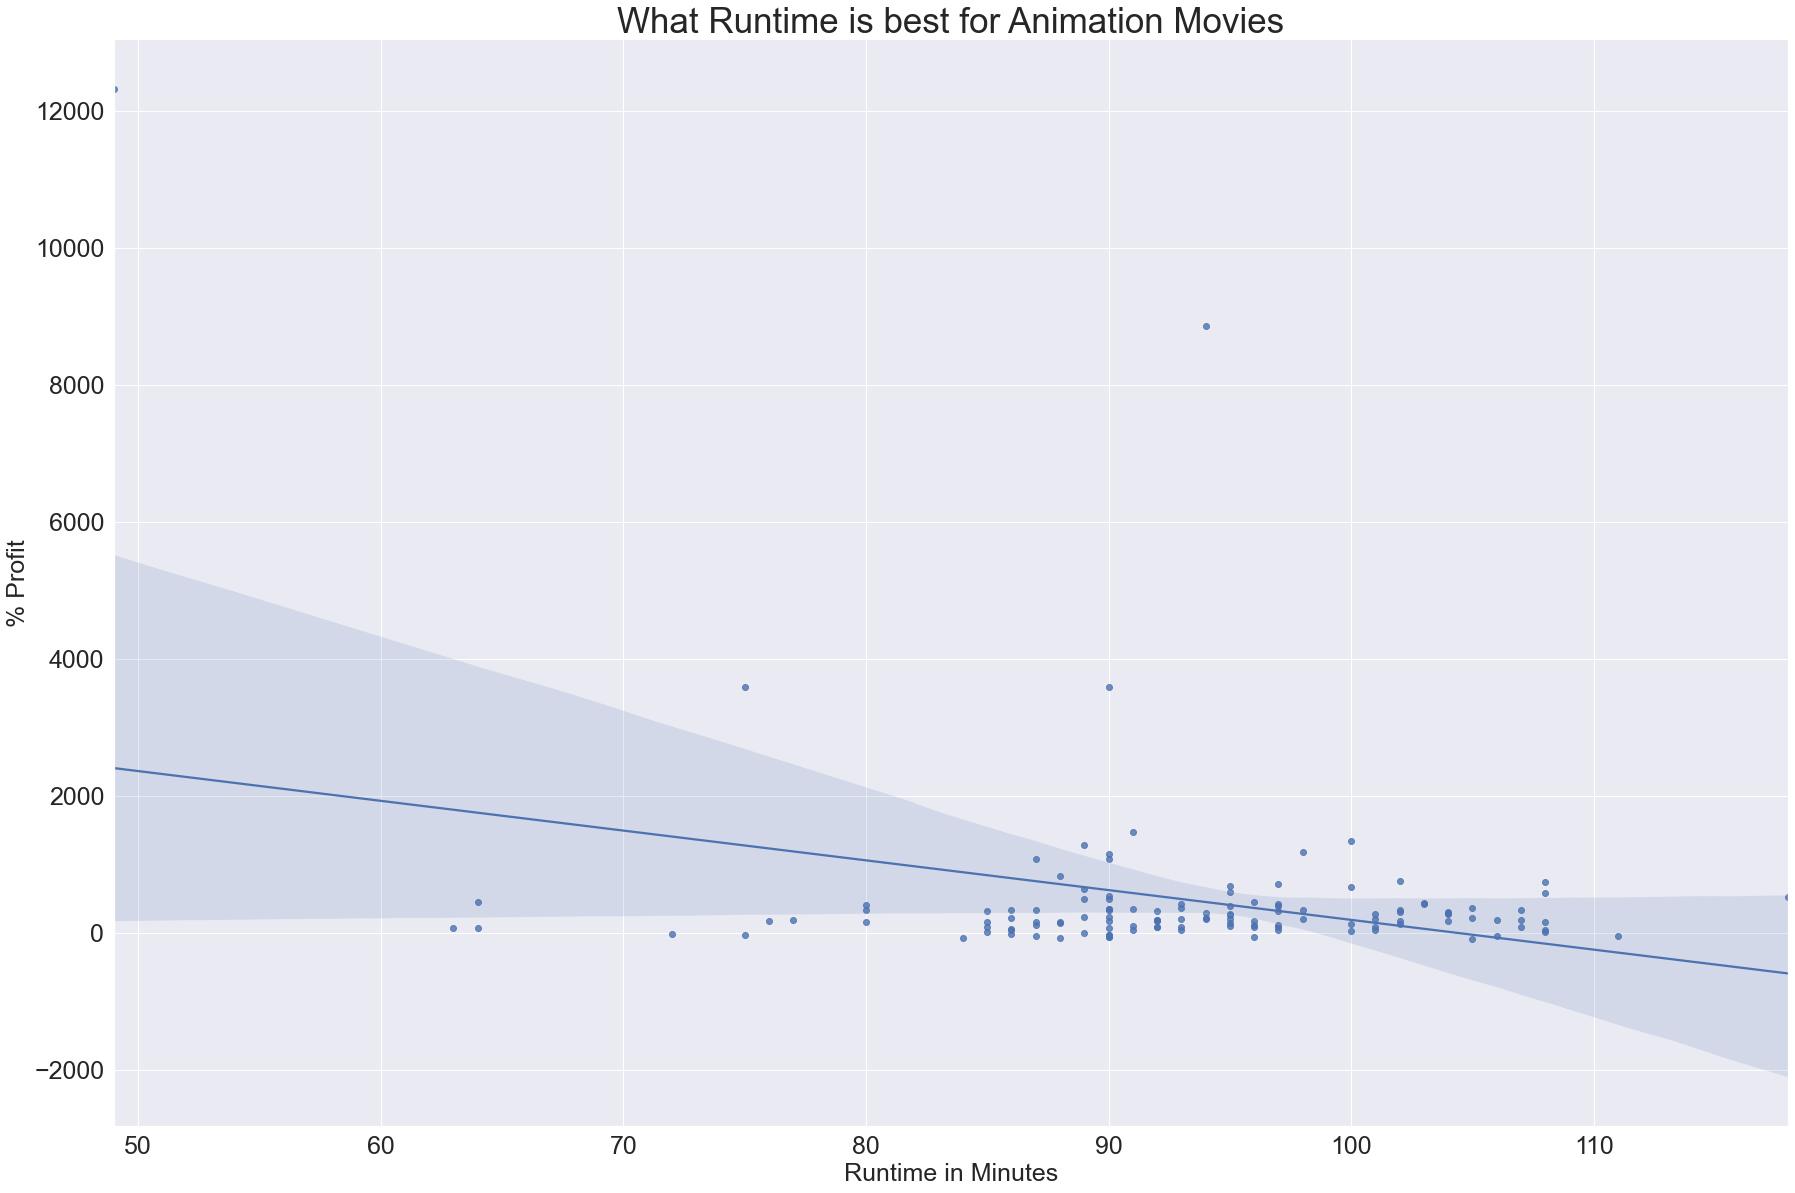

In [48]:
fig, ax = plt.subplots(figsize = (30,20))
df3_filtered = df3.loc[(df3['profit_as_percentage'] <= 15000) & (df3['runtime_minutes'] >= 45) & (df3['genres'] == 'Animation')]
ax = sns.regplot(x = 'runtime_minutes', y = 'profit_as_percentage', data = df3_filtered)
plt.title("What Runtime is best for Animation Movies", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Runtime in Minutes", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.tick_params(axis = 'x', labelsize = 25)
plt.savefig('images/animati')

# Best runtime for animated movies is around the 90 minute mark

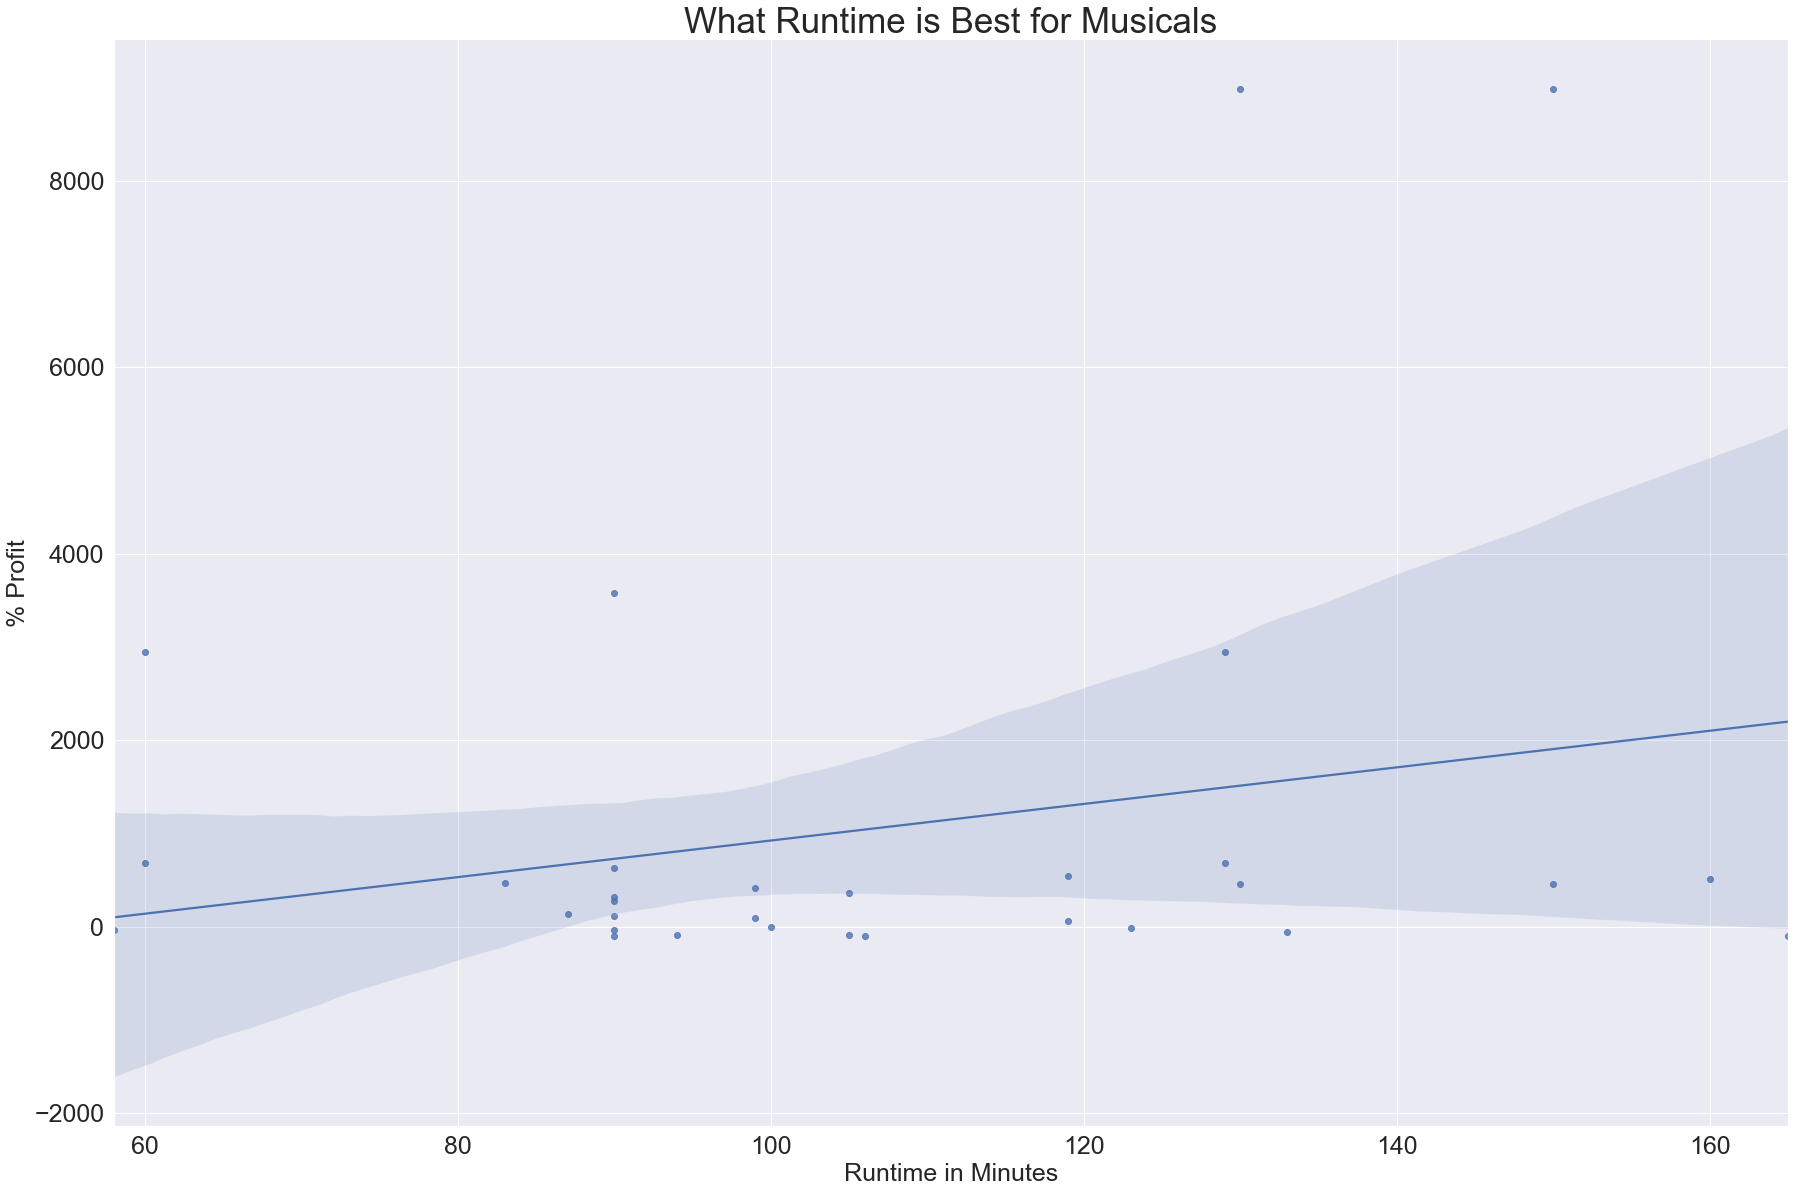

In [49]:
fig, ax = plt.subplots(figsize = (30,20))
df3_filtered = df3.loc[(df3['profit_as_percentage'] <= 15000) & (df3['runtime_minutes'] >= 45) & (df3['genres'] == 'Musical')]
ax = sns.regplot(x = 'runtime_minutes', y = 'profit_as_percentage', data = df3_filtered)
plt.title("What Runtime is Best for Musicals", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Runtime in Minutes", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.tick_params(axis = 'x', labelsize = 25)

# The best runtime for musicals is around 130 mark

In [50]:
df3.loc[df3['genres'] == 'Musical', 'runtime_minutes'].median()

100.0